In [5]:
from __future__ import division
from scipy import stats
from scipy.stats.stats import pearsonr, spearmanr
import scikits.bootstrap as boot
from scipy.stats import ttest_rel as ttrel
import itertools
import pyvttbl
from pyvttbl import DataFrame as DF
from pyvttbl.stats import Anova, Anova1way

In [6]:
os.chdir(pth+'PFH/iPFH/')

In [7]:
wpkppa = pd.read_csv("./IdxTC/WIN_AllSx_HouseClusters.csv")
wpkffa = pd.read_csv("./IdxTC/WIN_AllSx_FaceClusters.csv")

In [163]:
# NOTICE THE TILDE!!!!!!!!!! (i.e. get NOT the listed conditions)
ppa_fstim = wpkppa[~wpkppa.cond.isin(['hc', 'nc', 'fc','hchouse', 'nchouse', 'fchouse'])]
ppa_stim = wpkppa[~wpkppa.cond.isin(['hc', 'nc', 'fc'])]#,'hcface', 'nchouse', 'fchouse'])]
ffa_stim = wpkffa[~wpkffa.cond.isin(['hc', 'nc', 'fc'])]

In [164]:
hcs37 = ppa_stim.drop(ppa_stim[['1', '2','8','9','10','11','12']], 1)
hcs37['minpk'] = hcs37.min(axis=1)
hcs37['maxpk'] = hcs37.loc[:,'3':'7'].max(axis=1)

In [149]:
fcs37 = ffa_stim.drop(ffa_stim[['1', '2','8','9','10','11','12']], 1)
fcs37['minpk'] = fcs37.min(axis=1)
fcs37['maxpk'] = fcs37.loc[:,'3':'7'].max(axis=1)

In [165]:
fcs37min = fcs37.pivot_table('minpk', 'sx', 'cond')#, 'fchouse']
fcs37max = fcs37.pivot_table('maxpk', 'sx', 'cond')
hcs37min = hcs37.pivot_table('minpk', 'sx', 'cond')
hcs37max = hcs37.pivot_table('maxpk', 'sx', 'cond')
#ttrel(hch, fch)

In [156]:
ttrel(fcs37max['fcface'], fcs37max['hcface'])

(-2.5256425319695994, 0.021148387293976834)

In [159]:
ttrel(fcs37min['hchouse'], fcs37min['fchouse'])

(1.5701408230471048, 0.13379420946135262)

In [169]:
ttrel(hcs37min['hcface'], hcs37min['fcface'])

(-3.7721390870479952, 0.0013953861549797402)

In [168]:
ttrel(hcs37max['fchouse'], hcs37max['hchouse'])

(3.2021675938814673, 0.0049388987773134451)

In [134]:
fcf, hcf = hcs37.pivot_table('minpk', 'sx', 'cond')[['fcface','hcface']].values.T#, 'fchouse']
ttrel(hcf, fcf)

(-3.7721390870479952, 0.0013953861549797402)

array([ 0.00446, -0.36856, -0.36745, -0.04529,  0.02434, -0.265  ,
       -0.0615 ,  0.11564, -0.269  , -0.11411,  0.11921, -0.22578,
       -0.2009 , -0.07891, -0.07756, -0.16767, -0.18585, -0.07943, -0.27866])

In [99]:
# NOTICE THE TILDE!!!!!!!!!! (i.e. get NOT the listed conditions)
#ppa_fstim = wpkffa[~wpkffa.cond.isin(['hc', 'nc', 'fc','hchouse', 'nchouse', 'fchouse'])]
ffa_hstim = wpkffa[wpkffa.cond.isin(['hchouse', 'nchouse', 'fchouse'])]#,'hcface', 'nchouse', 'fchouse'])]
#ffa_stim = wpkffa[~wpkffa.cond.isin(['hc', 'nc', 'fc'])].groupby('cond').mean().values

In [86]:
ttrel(x['fchouse'], x['nchouse'])

(-0.53986369968609049, 0.59590754123186573)

In [102]:
x = ffa_hstim.iloc[:, :9].pivot_table('lowpk', index='sx', columns='cond', aggfunc=np.min)

KeyError: 'lowpk'

In [175]:
ppa_fstim.groupby('cond').mean()

,1,2,3,4,5,6,7,8,9,10,11,12
cond,,,,,,,,,,,,
fcface,-0.0233,-0.0154,0.0003,0.0265,-0.0134,-0.0626,-0.0665,-0.0514,-0.0454,-0.0228,-0.0248,-0.0021
hcface,0.0030,0.0170,0.0204,-0.0066,-0.0613,-0.1333,-0.1177,-0.0745,-0.0897,-0.0566,-0.0093,0.0105
ncface,0.0114,-0.0298,0.0113,0.0361,-0.0085,-0.0908,-0.1052,-0.0456,-0.0527,-0.0100,-0.0134,0.0060


In [179]:
ppa_fstim.groupby('cond').mean().values

array([[-0.0233 , -0.01536,  0.00034,  0.02652, -0.01336, -0.06263,
        -0.06653, -0.05144, -0.04545, -0.0228 , -0.02479, -0.00206],
       [ 0.00296,  0.01699,  0.0204 , -0.00661, -0.06126, -0.13335,
        -0.11774, -0.07454, -0.08975, -0.05664, -0.0093 ,  0.01047],
       [ 0.01137, -0.02984,  0.01126,  0.03608, -0.00849, -0.09081,
        -0.10521, -0.04559, -0.05271, -0.01002, -0.01337,  0.00601]])

In [180]:
ppa_fstim.cond.unique()

array(['hcface', 'ncface', 'fcface'], dtype=object)

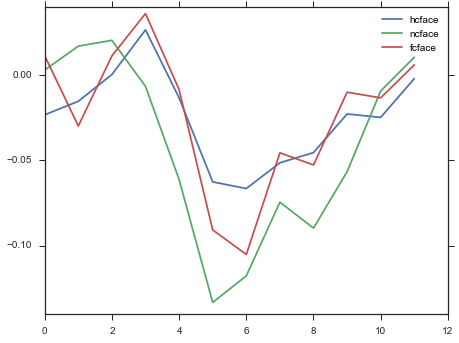

In [178]:
x = np.arange(len(wpkppa.columns[2:]))
for i, mu in enumerate(ppa_fstim.groupby('cond').mean().values):
      plt.plot(x, mu, label=ppa_fstim.cond.unique()[i])
plt.gca().legend()

In [68]:
ffa_hstim

array([ 0.02261, -0.01969,  0.01445,  0.02245,  0.08256,  0.0926 ,
        0.05376,  0.04192, -0.02002, -0.02344, -0.04105, -0.02684])

In [72]:
ffa_hst

array([[-0.01848, -0.03693,  0.01724, -0.01784,  0.03381,  0.12211,
         0.05904,  0.04723, -0.00452, -0.01471,  0.03674, -0.00076],
       [ 0.05086, -0.0063 ,  0.02567,  0.04596,  0.15161,  0.07759,
         0.05371,  0.05022, -0.02431, -0.06223, -0.08076, -0.03779],
       [ 0.03544, -0.01585,  0.00045,  0.03924,  0.06226,  0.07809,
         0.04854,  0.02832, -0.03121,  0.00662, -0.07912, -0.04197]])

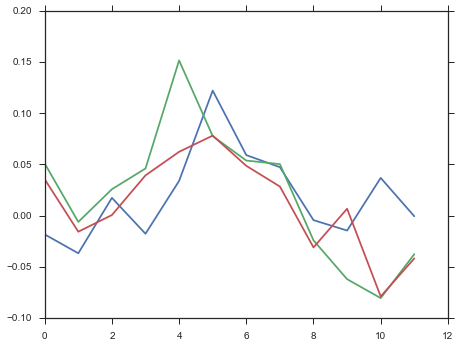

In [70]:
x = np.arange(len(wpkffa.columns[2:]))
for mu in ffa_hstim:
      plt.plot(x, mu)

In [30]:
ppa_fstim

,1,2,3,4,5,6,7,8,9,10,11,12
cond,,,,,,,,,,,,
fcface,-0.0233,-0.0154,0.0003,0.0265,-0.0134,-0.0626,-0.0665,-0.0514,-0.0454,-0.0228,-0.0248,-0.0021
hcface,0.0030,0.0170,0.0204,-0.0066,-0.0613,-0.1333,-0.1177,-0.0745,-0.0897,-0.0566,-0.0093,0.0105
ncface,0.0114,-0.0298,0.0113,0.0361,-0.0085,-0.0908,-0.1052,-0.0456,-0.0527,-0.0100,-0.0134,0.0060


In [27]:
[np.min(ppaf) for ppaf in ppa_fstim]

[-0.066532038947368421, -0.13334940631578948, -0.10520619526315791]

In [36]:
ppafcfmin = ppa_fstim[ppa_fstim.cond=='fcface'].min(axis=1)
ppahcfmin = ppa_fstim[ppa_fstim.cond=='hcface'].min(axis=1)

In [63]:
ffafchmin = ffa_hstim.loc[:,'1':][ffa_hstim.cond=='fchouse'].min(axis=1)
ffahchmin = ffa_hstim.loc[:,'1':][ffa_hstim.cond=='hchouse'].min(axis=1)

In [54]:
ppahchmax = ppa_hstim.loc[:,'1':][ppa_hstim.cond=='hchouse'].max(axis=1)
ppafchmax = ppa_hstim.loc[:,'1':][ppa_hstim.cond=='fchouse'].max(axis=1)

In [54]:
ppahchmax = ppa_hstim.loc[:,'1':][ppa_hstim.cond=='hchouse'].max(axis=1)
ppafchmax = ppa_hstim.loc[:,'1':][ppa_hstim.cond=='fchouse'].max(axis=1)

In [57]:
ttrel(ppafchmax, ppahchmax)

(3.1517337984922698, 0.0055173157118805771)

In [64]:
ttrel(ffahchmin, ffafchmin)

(2.1781595401109093, 0.04293391397612082)

In [38]:
ttrel(ppahcfmin, ppafcfmin)

(-4.7395059039074621, 0.0001636641695634319)

In [32]:
ttrel(ppa_fstim.loc['fcface',:], ppa_fstim.loc['hcface',:])

(1.6018968633402604, 0.13748254878460331)